In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imdevskp/corona-virus-report", path = 'country_wise_latest.csv')

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

df = pd.read_csv('https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv')
df.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462


In [25]:
# Task: Test whether the average COVID-19 death rate differs significantly between India and Pakistan

india_df = df[df['country'] == "India"]
pakistan_df = df[df['country'] == "Pakistan"]

# Replace missing values of new_deaths by 0
india_df['new_deaths'] = india_df['new_deaths'].fillna(0)
pakistan_df['new_deaths'] = pakistan_df['new_deaths'].fillna(0)

/var/folders/f0/6c2mckf96hnbv1zk3wjpzcl00000gn/T/ipykernel_845/3957333445.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_df['new_deaths'] = india_df['new_deaths'].fillna(0)
/var/folders/f0/6c2mckf96hnbv1zk3wjpzcl00000gn/T/ipykernel_845/3957333445.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pakistan_df['new_deaths'] = pakistan_df['new_deaths'].fillna(0)


In [26]:
india_df['new_deaths'].describe()

count    1902.000000
mean      280.579390
std       670.694666
min         0.000000
25%         0.000000
50%        11.000000
75%       289.000000
max      6148.000000
Name: new_deaths, dtype: float64

In [30]:
pakistan_df['new_deaths'].describe()

count    1902.000000
mean       16.117771
std        30.305247
min         0.000000
25%         0.000000
50%         0.000000
75%        18.000000
max       313.000000
Name: new_deaths, dtype: float64

In [36]:
# As we we see and setup our hypothese that
# HO -> Death rates were not significantly different between India and Pakistan
# H1 -> Death rates were significantly different between India and Pakistan

t_stat, p_val = stats.ttest_ind(india_df['new_deaths'], pakistan_df['new_deaths'])

print(t_stat)
print(p_val)

# As the p_value is really small, we can reject the H0 hypothesis and our assumption was correct

17.17909041284595
9.172807795150962e-64


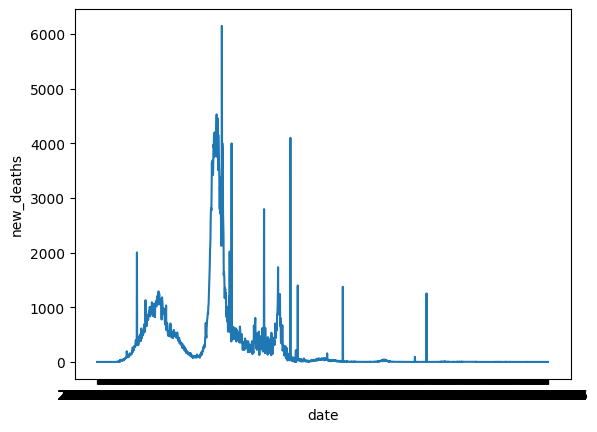

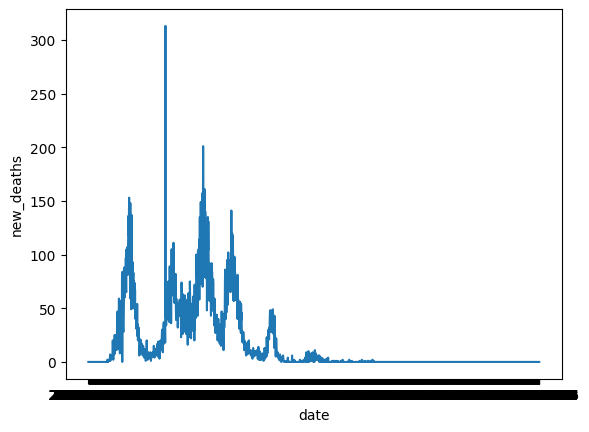

In [38]:
# Lets try to visualize per day rate of deaths in both the countries

sns.lineplot(x='date', y='new_deaths', data=india_df)
plt.show()

sns.lineplot(x='date', y='new_deaths', data=pakistan_df)
plt.show()

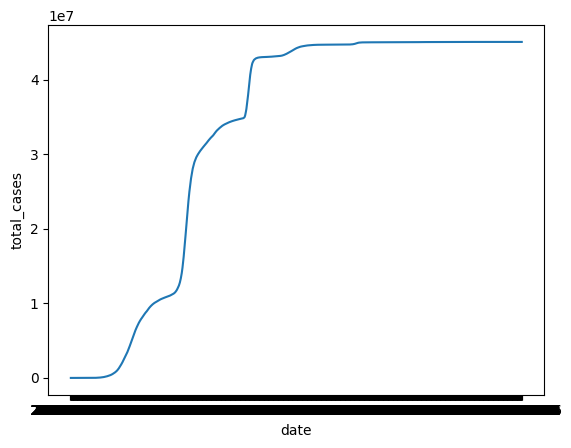

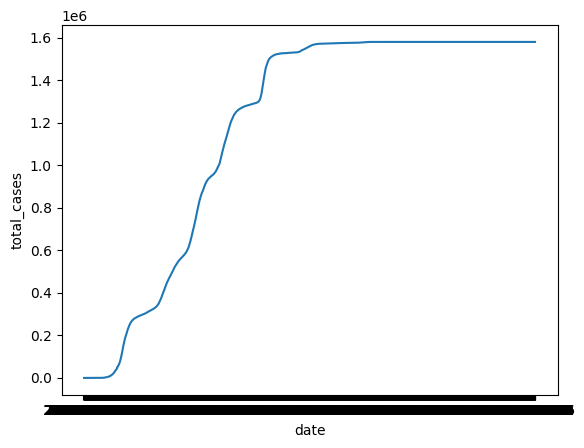

In [39]:
sns.lineplot(x='date', y='total_cases', data=india_df)
plt.show()

sns.lineplot(x='date', y='total_cases', data=pakistan_df)
plt.show()